<a href="https://colab.research.google.com/github/Blackraid11/Story/blob/master/Space_Missions_Analysis_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
rows, columns = df_data.shape
print(f"The DataFrame has {rows} rows and {columns} columns.")

The DataFrame has 4324 rows and 9 columns.


In [7]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [8]:
df_data.isna().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Organisation,0
Location,0
Date,0
Detail,0
Rocket_Status,0
Price,3360
Mission_Status,0


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [9]:
df_data.duplicated().sum()

0

In [10]:
df_cleaned = df_data.dropna()

In [11]:
df_cleaned.tail()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
3855,3855,3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.0,Success
3971,3971,3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success
3993,3993,3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success
4000,4000,4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success
4020,4020,4020,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Tue Sep 01, 1964 15:00 UTC",Titan IIIA | Transtage 1,StatusRetired,63.23,Failure


## Descriptive Statistics

In [12]:
df_cleaned.describe()

,Unnamed: 0.1,Unnamed: 0
count,964.00,964.00
mean,858.49,858.49
std,784.21,784.21
min,0.00,0.00
25%,324.75,324.75
50%,660.50,660.50
75%,"1,112.00","1,112.00"
max,"4,020.00","4,020.00"


In [13]:

df_data['Country'] = df_data['Location'].str.extract(r',\s*([^,]+)$')

# Step 3: (Optional) Save the updated DataFrame back to CSV

# Display the DataFrame with the extracted country names
print(df_data['Country'].value_counts())

# Step 3: (Optional) Save the updated DataFrame back to Excel

Country
Russia                            1395
USA                               1344
Kazakhstan                         701
France                             303
China                              268
Japan                              126
India                               76
Pacific Ocean                       36
New Zealand                         13
Iran                                13
Israel                              11
Kenya                                9
Australia                            6
North Korea                          5
New Mexico                           4
South Korea                          3
Barents Sea                          3
Brazil                               3
Gran Canaria                         2
Pacific Missile Range Facility       1
Yellow Sea                           1
Shahrud Missile Test Site            1
Name: count, dtype: int64


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

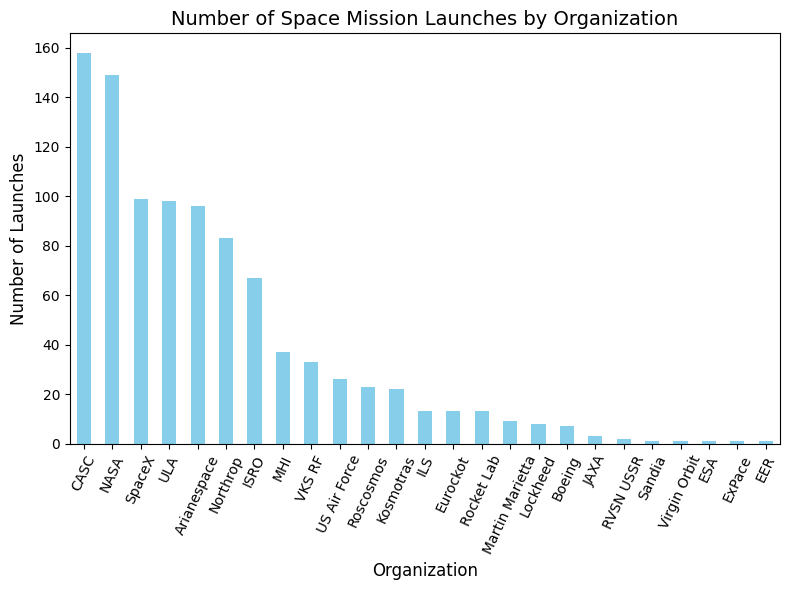

In [14]:
mission_counts = df_cleaned['Organisation'].value_counts()
plt.figure(figsize=(8, 6))
mission_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Space Mission Launches by Organization', fontsize=14)
plt.xlabel('Organization', fontsize=12)
plt.ylabel('Number of Launches', fontsize=12)
plt.xticks(rotation=65)
plt.tight_layout()
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

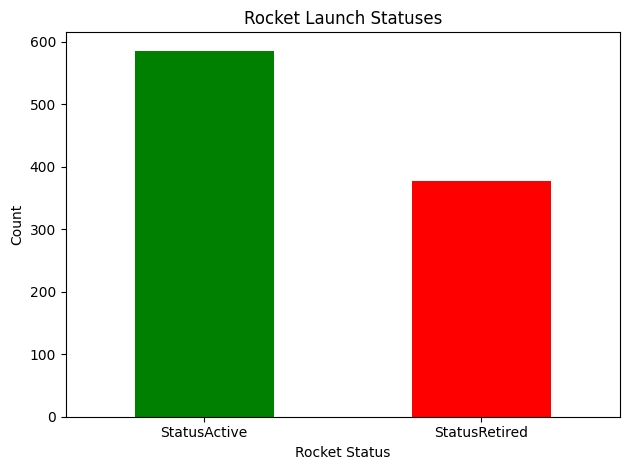

In [15]:
rocket_status_counts = df_cleaned['Rocket_Status'].value_counts()


rocket_status_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Rocket Launch Statuses')
plt.xlabel('Rocket Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [16]:
df_cleaned.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [18]:
mission_status = df_cleaned['Mission_Status'].value_counts()

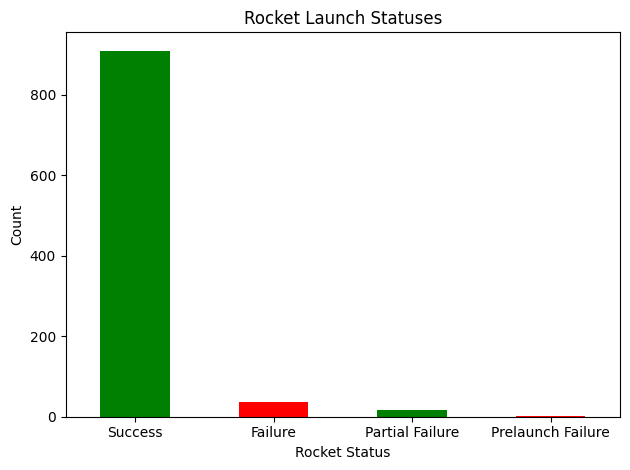

In [19]:
mission_status.plot(kind='bar', color=['green', 'red'])
plt.title('Rocket Launch Statuses')
plt.xlabel('Rocket Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [20]:
df_data['Price'] = pd.to_numeric(df_data['Price'], errors='coerce')

# Fill missing values with the mean of the 'Price' column
df_data['Price'] = df_data['Price'].fillna(df_data['Price'].mean())

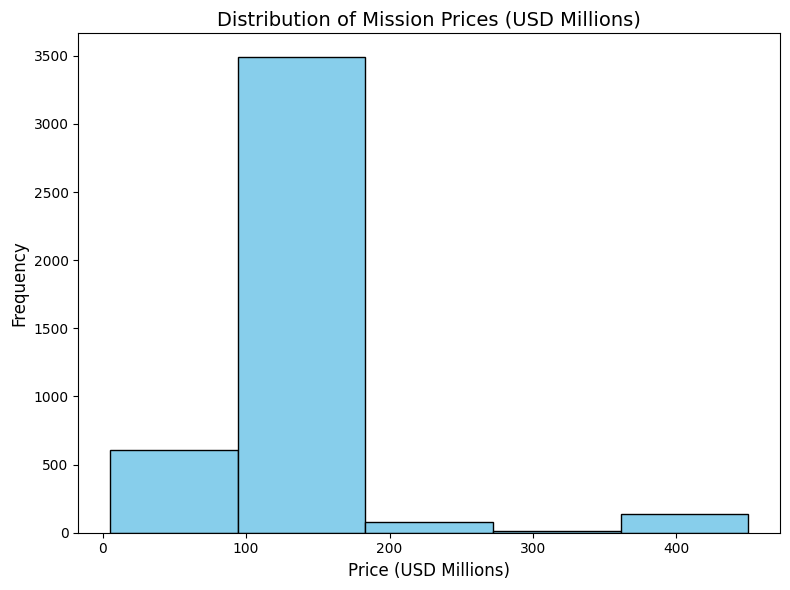

In [20]:
plt.figure(figsize=(8, 6))
plt.hist(df_data['Price'], bins=5, color='skyblue', edgecolor='black')  # Adjust the number of bins
plt.title('Distribution of Mission Prices (USD Millions)', fontsize=14)
plt.xlabel('Price (USD Millions)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

In [25]:
country_code_mapping = {
    "USA": "USA",
    "China": "CHN",
    "Russia": "RUS",
    "Kazakhstan": "KAZ",
    "Israel": "ISR",
    "Japan": "JPN",
    "France": "FRA",
    "India": "IND",
    "New Zealand": "NZL",
    "Iran": "IRN",
    "France": "FRA",
    # Add more countries as needed
}

# Step 2: Apply the mapping to the 'Country' column to create the 'Country Code' column
df_data['Country Code'] = df_data['Country'].map(country_code_mapping)

# Step 3: Handle any missing country codes (if there are countries not in the dictionary)
df_data['Country Code'] = df_data['Country Code'].fillna('Unknown')

# Step 4: Count the number of launches per country
launch_counts = df_data['Country Code'].value_counts().reset_index()
launch_counts.columns = ['Country Code', 'Launch Count']

# Step 5: Create the choropleth map
fig = px.choropleth(
    launch_counts,
    locations="Country Code",
    color="Launch Count",
    hover_name="Country Code",
    hover_data=["Launch Count"],
    color_continuous_scale="matter",  # Sequential color scale "matter"
    labels={"Launch Count": "Number of Launches", "Country Code": "Country"},
    title="Number of Launches by Country"
)

# Show the map
fig.show()

In [26]:

df_data['Country'] = df_data['Location'].str.extract(r',\s*([^,]+)$')
df_data

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country Code
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,129.80,Success,USA,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA
...,...,...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,129.80,Failure,USA,USA
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,129.80,Success,USA,USA
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,129.80,Failure,USA,USA
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,129.80,Success,Kazakhstan,KAZ


In [27]:
df_data['Location']

,Location
0,"LC-39A, Kennedy Space Center, Florida, USA"
1,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce..."
2,"Pad A, Boca Chica, Texas, USA"
3,"Site 200/39, Baikonur Cosmodrome, Kazakhstan"
4,"SLC-41, Cape Canaveral AFS, Florida, USA"
...,...
4319,"LC-18A, Cape Canaveral AFS, Florida, USA"
4320,"LC-26A, Cape Canaveral AFS, Florida, USA"
4321,"LC-18A, Cape Canaveral AFS, Florida, USA"
4322,"Site 1/5, Baikonur Cosmodrome, Kazakhstan"


# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

# Use a Choropleth Map to Show the Number of Failures by Country


In [29]:
failure_data = df_data[df_data['Mission_Status'] == 'Failure']
failure_counts = failure_data['Country Code'].value_counts().reset_index()
failure_counts.columns = ['Country Code', 'Failure Count']


fig = px.choropleth(
    failure_counts,
    locations="Country Code",
    color="Failure Count",
    hover_name="Country Code",
    hover_data=["Failure Count"],
    color_continuous_scale="matter",  # Sequential color scale "matter"
    labels={"Failure Count": "Number of Failures", "Country Code": "Country"},
    title="Number of Failures by Country"
)

# Show the map
fig.show()

In [30]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country Code
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,129.80,Success,USA,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA


# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [31]:
df_sunburst = df_data.groupby(['Organisation', 'Mission_Status', 'Country']).size().reset_index(name='Count')

# Create the Sunburst chart using Plotly
fig = px.sunburst(
    df_sunburst,
    path=['Organisation', 'Mission_Status', 'Country'],  # Hierarchy from Organization to Mission Status to Location
    values='Count',  # The size of the segments
    title="Sunburst Chart: Countries, Organizations, and Mission Status"
)

# Show the chart
fig.show()

In [32]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country Code
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,129.80,Success,USA,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA


# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [33]:
organization_spending = df_data.groupby('Organisation')['Price'].sum().reset_index()

In [34]:
organization_spending = organization_spending.sort_values(by='Price', ascending=False)



In [35]:
# Display the result
print(organization_spending)

        Organisation      Price
40         RVSN USSR 230,646.14
35              NASA  69,896.28
3        Arianespace  40,097.53
17  General Dynamics  32,578.60
52            VKS RF  23,354.50
48               ULA  20,249.40
49      US Air Force  19,073.28
7               CASC  18,411.22
6             Boeing  17,984.59
34   Martin Marietta  14,349.90
32               MHI   9,632.88
31          Lockheed   9,495.46
19               ILS   5,603.24
46            SpaceX   5,573.80
42         Roscosmos   5,340.95
45        Sea Launch   4,672.63
36          Northrop   3,930.00
22              ISAS   3,893.86
23              ISRO   3,345.16
50           US Navy   2,206.52
21               ISA   1,687.34
13               ESA   1,594.54
5        Blue Origin   1,557.54
18               IAI   1,427.75
15            ExPace   1,196.46
2                ASI   1,168.16
1               AMBA   1,038.36
10              CNES   1,038.36
33              MITT     908.57
29       Land Launch     908.57
24      

# Analyse the Amount of Money Spent by Organisation per Launch

In [36]:
df_data['Price'] = pd.to_numeric(df_data['Price'], errors='coerce')

In [37]:
organization_launch_analysis = df_data.groupby('Organisation').agg(
    Total_Spending=('Price', 'sum'),   # Total spending for each organization
    Launch_Count=('Price', 'size')     # Count of launches for each organization
).reset_index()

organization_launch_analysis['Avg_Spending_Per_Launch'] = organization_launch_analysis['Total_Spending'] / organization_launch_analysis['Launch_Count']

organization_launch_analysis = organization_launch_analysis.sort_values(by='Avg_Spending_Per_Launch', ascending=False)

In [38]:

fig = px.bar(
    organization_launch_analysis,
    x='Organisation',
    y='Avg_Spending_Per_Launch',
    title="Average Amount Spent by Organization Per Launch",
    labels={'Avg_Spending_Per_Launch': 'Average Spending per Launch (in Millions)', 'Organization': 'Organization'},
    color='Avg_Spending_Per_Launch'
)

# Show the plot
fig.show()


# Chart the Number of Launches per Year

In [39]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country Code
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,129.80,Success,USA,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA


In [40]:
df_data['Date'] = pd.to_datetime(df_data['Date'], errors='coerce')

# Extract the year using the .dt accessor
df_data['Year'] = df_data['Date'].dt.year

df_data['Year'] = df_data['Year'].fillna(0)

df_data['Year'] = df_data['Year'].astype(int).replace({',': ''}, regex=True)
# Print the DataFrame with the new 'Year' column
print(df_data[['Date', 'Year']])


                          Date  Year
0    2020-08-07 05:12:00+00:00  2020
1    2020-08-06 04:01:00+00:00  2020
2    2020-08-04 23:57:00+00:00  2020
3    2020-07-30 21:25:00+00:00  2020
4    2020-07-30 11:50:00+00:00  2020
...                        ...   ...
4319 1958-02-05 07:33:00+00:00  1958
4320 1958-02-01 03:48:00+00:00  1958
4321 1957-12-06 16:44:00+00:00  1957
4322 1957-11-03 02:30:00+00:00  1957
4323 1957-10-04 19:28:00+00:00  1957

[4324 rows x 2 columns]


In [41]:
df_data = df_data[(df_data['Year'] >= 1900) & (df_data['Year'] <= 2020)]
launches_per_year = df_data.groupby('Year').size().reset_index(name='Launch Count')
fig = px.bar(
    launches_per_year,
    x='Year',
    y='Launch Count',
    title="Number of Launches per Year",
    labels={'Year': 'Year', 'Launch Count': 'Number of Launches'},
    color='Launch Count',  # Optionally color the bars by count
    color_continuous_scale='Viridis',  # Choose a color scale
)

fig.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [42]:
df_data['Date'] = pd.to_datetime(df_data['Date'], errors='coerce')

# Step 2: Extract the month from the 'Date' column
df_data['Month'] = df_data['Date'].dt.month

# Step 3: Filter the data to include only dates from 1900 to the current year
current_year = pd.to_datetime("today").year
df_data = df_data[(df_data['Date'].dt.year >= 1900) & (df_data['Date'].dt.year <= current_year)]

# Step 4: Group by month and count the number of launches per month
launches_per_month = df_data.groupby('Month').size().reset_index(name='Launch Count')

# Step 5: Create a bar chart showing the number of launches month-by-month
fig = px.bar(
    launches_per_month,
    x='Month',
    y='Launch Count',
    title="Number of Launches Month-by-Month (1900 to Present)",
    labels={'Month': 'Month', 'Launch Count': 'Number of Launches'},
    color='Launch Count',  # Optionally color the bars by count
    color_continuous_scale='Viridis',  # Choose a color scale
    category_orders={'Month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}  # Order months from 1 to 12
)

# Show the chart
fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']  # Month names
    )
)

# Show the chart
fig.show()

<ipython-input-42-3489b96050ec>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-42-3489b96050ec>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country Code,Year,Month
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,2020,8
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,2020,8
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,129.80,Success,USA,USA,2020,8
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ,2020,7
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA,2020,7


# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [44]:
launches_per_month = df_data.groupby('Month').size().reset_index(name='Launch Count')

# Step 5: Sort by the number of launches (ascending and descending)
sorted_launches = launches_per_month.sort_values(by='Launch Count', ascending=False)

# Step 6: Identify most and least popular months
most_popular_month = sorted_launches.iloc[0]
least_popular_month = sorted_launches.iloc[-1]


print(f"Most Popular Month: {most_popular_month['Month']} with {most_popular_month['Launch Count']} launches")
print(f"Least Popular Month: {least_popular_month['Month']} with {least_popular_month['Launch Count']} launches")

Most Popular Month: 12 with 430 launches
Least Popular Month: 1 with 265 launches


# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [47]:
df_data['Date'] = pd.to_datetime(df_data['Date'], errors='coerce')

# Step 2: Clean the 'Price' column by removing commas and converting to numeric
df_data['Price'] = df_data['Price'].replace({',': ''}, regex=True).astype(float)

# Step 3: Extract the year from the 'Date' column
df_data['Year'] = df_data['Date'].dt.year

# Step 4: Group by 'Year' and calculate the average price per year
price_over_time = df_data.groupby('Year')['Price'].mean().reset_index()

# Step 5: Create a line plot to visualize the variation of price over time
fig = px.line(
    price_over_time,
    x='Year',
    y='Price',
    title="Launch Price Variation Over Time",
    labels={'Year': 'Year', 'Price': 'Average Launch Price ($)'},
    markers=True
)

# Show the plot
fig.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [48]:
df_data['Date'] = pd.to_datetime(df_data['Date'], errors='coerce')

# Step 2: Extract the year from the 'Date' column
df_data['Year'] = df_data['Date'].dt.year

# Step 3: Count the number of launches per year for each organization
launches_by_org = df_data.groupby(['Year', 'Organisation']).size().reset_index(name='Launch Count')

# Step 4: Identify the top 10 organizations with the most launches
top_10_orgs = df_data['Organisation'].value_counts().head(10).index

# Filter the data to include only the top 10 organizations
launches_by_org_top10 = launches_by_org[launches_by_org['Organisation'].isin(top_10_orgs)]

# Step 5: Create a line plot showing the number of launches over time by the top 10 organizations
fig = px.line(
    launches_by_org_top10,
    x='Year',
    y='Launch Count',
    color='Organisation',
    title="Number of Launches Over Time by Top 10 Organizations",
    labels={'Year': 'Year', 'Launch Count': 'Number of Launches'},
    markers=True
)

# Show the chart
fig.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [55]:
df_data['Date'] = pd.to_datetime(df_data['Date'], errors='coerce')
df_data['Year'] = df_data['Date'].dt.year

# Step 2: Create cold_data to get the count of launches by organization
cold_data = df_data[df_data['Country'].isin(['USA', 'Russia'])]

# Step 3: Filter the data for Cold War period (1947-1991)
cold_war_data = df_data[(df_data['Year'] >= 1947) & (df_data['Year'] <= 1991)]

launch_count_cold_war = cold_war_data.groupby(['Year', 'Country']).size().reset_index(name='Launch Count')

fig = px.line(
    launch_count_cold_war,
    x='Year',
    y='Launch Count',
    color='Country',
    title="Cold War Space Race: USA vs USSR (1947-1991)",
    labels={'Launch Count': 'Number of Launches', 'Year': 'Year'},
    line_shape='linear'
)

# Show the plot
fig.show()

In [50]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country Code,Year,Month
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,2020,8
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,2020,8
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,129.80,Success,USA,USA,2020,8
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ,2020,7
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA,2020,7


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [51]:
df_data['Country'].value_counts()

,count
Country,
Russia,1351
USA,1321
Kazakhstan,679
France,303
China,264
Japan,122
India,75
Pacific Ocean,32
New Zealand,13


In [53]:
df_filtered = df_data[df_data['Country'].isin(['USA', 'Russia'])]

# Step 2: Count the number of launches per country
launch_counts = df_filtered['Country'].value_counts().reset_index()
launch_counts.columns = ['Country', 'Launch Count']

# Step 3: Create the Pie Chart
fig = px.pie(
    launch_counts,
    names='Country',  # Labels for the segments
    values='Launch Count',  # Values representing the size of each segment
    title="Total Number of Launches: USA vs USSR",
    color='Country',  # Color based on the country
    color_discrete_map={'USA': 'blue', 'Russia': 'red'}  # Custom colors for USA and Russia
)

fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [56]:
df_filtered = df_data[df_data['Country'].isin(['USA', 'Russia'])]

df_filtered['Year'] = pd.to_datetime(df_filtered['Date'], errors='coerce').dt.year

launch_counts_by_year = df_filtered.groupby(['Year', 'Country']).size().reset_index(name='Launch Count')

fig = px.line(
    launch_counts_by_year,
    x='Year',  # x-axis represents the Year
    y='Launch Count',  # y-axis represents the number of launches
    color='Country',  # Different lines for USA and Russia
    title="Year-on-Year Launch Comparison: USA vs USSR",
    labels={"Launch Count": "Number of Launches", "Year": "Year"},
    markers=True  # Show markers on the line
)

# Show the chart
fig.show()

<ipython-input-56-b9dd0f4271b1>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Chart the Total Number of Mission Failures Year on Year.

In [61]:
df_failures = df_data[df_data['Mission_Status'].str.contains('failure', case=False, na=False)]

# Step 2: Extract the year from the 'Date' column (ensure 'Date' is in datetime format)
df_failures['Year'] = pd.to_datetime(df_failures['Date'], errors='coerce').dt.year

# Step 3: Group by Year to count the number of mission failures
failures_by_year = df_failures.groupby('Year').size().reset_index(name='Failure Count')

# Step 4: Create a line chart to visualize the mission failures year-on-year
fig = px.line(
    failures_by_year,
    x='Year',  # x-axis represents the Year
    y='Failure Count',  # y-axis represents the number of failures
    title="Year-on-Year Mission Failures",
    labels={"Failure Count": "Number of Mission Failures", "Year": "Year"},
    markers=True  # Optional: Add markers to highlight data points
)

# Show the chart
fig.show()

<ipython-input-61-77789edbc691>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [63]:
df_data['Year'] = pd.to_datetime(df_data['Date'], errors='coerce').dt.year

# Step 2: Filter the data for mission failures
# Assuming 'Status' column contains success/failure information
df_failures = df_data[df_data['Mission_Status'].str.contains('failure', case=False, na=False)]

# Step 3: Group by Year to count total launches and failures
total_launches_by_year = df_data.groupby('Year').size().reset_index(name='Total Launches')
failures_by_year = df_failures.groupby('Year').size().reset_index(name='Failure Count')

# Step 4: Merge the total launches and failures data on Year
launch_data = pd.merge(total_launches_by_year, failures_by_year, on='Year', how='left')

# Step 5: Compute the percentage of failures for each year
launch_data['Failure Percentage'] = (launch_data['Failure Count'] / launch_data['Total Launches']) * 100

# Step 6: Plot the percentage of failures over time
fig = px.line(
    launch_data,
    x='Year',
    y='Failure Percentage',
    title="Percentage of Mission Failures Over Time",
    labels={"Failure Percentage": "Percentage of Failures", "Year": "Year"},
    markers=True  # Optional: Add markers to highlight data points
)

# Show the chart
fig.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [64]:
df_data['Year'] = pd.to_datetime(df_data['Date'], errors='coerce').dt.year

# Step 2: Filter data to include launches only up to and including 2020
df_data = df_data[df_data['Year'] <= 2020]

# Step 3: Group by Year and Country, and count the number of launches
launch_counts = df_data.groupby(['Year', 'Country']).size().reset_index(name='Launch Count')

# Step 4: Find the country with the most launches for each year
leading_countries = launch_counts.loc[launch_counts.groupby('Year')['Launch Count'].idxmax()]

# Step 5: Create the plot to show which country was in the lead each year
fig = px.line(
    leading_countries,
    x='Year',
    y='Launch Count',
    color='Country',
    title="Leading Country in Number of Launches per Year (Up to 2020)",
    labels={"Launch Count": "Number of Launches", "Year": "Year"},
    markers=True  # Add markers to highlight the points
)

# Show the chart
fig.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [65]:
df_data['Year'] = pd.to_datetime(df_data['Date'], errors='coerce').dt.year

# Step 2: Group by Year and Organization, and count the number of launches
launch_counts_by_org = df_data.groupby(['Year', 'Organisation']).size().reset_index(name='Launch Count')

# Step 3: Find the organization with the most launches for each year
leading_orgs = launch_counts_by_org.loc[launch_counts_by_org.groupby('Year')['Launch Count'].idxmax()]

# Step 4: Create the plot to show the leading organization each year
fig = px.line(
    leading_orgs,
    x='Year',
    y='Launch Count',
    color='Organisation',
    title="Leading Organization in Number of Launches per Year",
    labels={"Launch Count": "Number of Launches", "Year": "Year"},
    markers=True  # Add markers to highlight the points
)

# Show the chart
fig.show()